## «*La escuela es la agencia publicitaria que te hace creer que necesitas la sociedad tal como es*».

### [Iván ILLICH](https://es.wikipedia.org/wiki/Iv%C3%A1n_Illich)


# SI04 Matplotlib

Actividad individual.

Utilice el dataset asignado en [datasets panda](https://docs.google.com/spreadsheets/d/e/2PACX-1vQi3ziCNg_TlAHPvHceFDyqFZeouQk7-uWcSSv-VTsYHnzx5VEyp3u_rp5pNiuPdNta898xj7vJzZPL/pubhtml).

Resuelva los siguientes ejercicios con códigos que se ajusten al PEP8. Recuerde incluir los comentarios en el código y documentar las funciones con docstrings al estilo de Google.

**Importante:**

**no se permite la utilización de ciclos (for or while) para resolver los ejercicios.**

**todos los ejercicios deben ser resueltos con Matplotlib, puede utilizar NumPy y Pandas para la preparación de los datos.**

# Preparación del ejercicio

*   Importe las librerías requeridas
*   Lea el dataset a utilizar, **UNA SOLA VEZ**, desde una url y utilice esa información para resolver los ejercicios indicados

**Sugerencia**: suba el dataset a un repositorio de GitHub, o al Googledrive de su **cuenta personal de gmail** y luego publíquelo en la web como un archivo *.csv.

Nota: si lo desea puede utilizar otro método para obtener la url del dataset.

In [1]:
try:
    # Importar las librerías necesarias
    import urllib.request
    import csv
    import numpy as np
    import pandas as pd
    import matplotlib
    import matplotlib.pyplot as plt
    
    # Verificar si colorama está instalado y si no, instalarlo
    try:
        from colorama import Fore, Style
    except ImportError:
        %pip install colorama
        from colorama import Fore, Style
    
    # Conocer la versiones de las librerías instaladas
    print("\033[3m" + "\033[1m" + Fore.RED + 
          "Versión de urllib.request: " + Style.RESET_ALL + 
          urllib.request.__version__)
    print("\033[3m" + "\033[1m" + Fore.RED +
          "Versión de csv:" + Style.RESET_ALL, csv.__version__)
    print("\033[3m" + "\033[1m" + Fore.RED +
            "Versión de numpy:" + Style.RESET_ALL, np.__version__)
    print("\033[3m" + "\033[1m" + Fore.RED +
            "Versión de matplotlib:" + Style.RESET_ALL, matplotlib.__version__)

    # Guardar en la variable 'ruta' la url del dataset
    ruta = ("https://raw.githubusercontent.com/BluessyJazz/"
            "Programacion-Para-Ingenieria_2024-1/main/SI03%20Pandas/"
            "2023_rankings.csv")

    # Cargar el dataset a partir de la ruta establecida
    urllib.request.urlretrieve(ruta, "2023_rankings.csv")

    # Verificar la lectura del dataset
    # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv("2023_rankings.csv")

    # Mostrar las primeras filas del DataFrame para verificar la lectura
    print("\n" + "\033[3m" + "\033[1m" + Fore.RED + 
          "Primeras filas del DataFrame:" + Style.RESET_ALL)
    print(df.head())

    # Ruta donde se encuentra alojado el archivo
    datos = "2023_rankings.csv"

except urllib.error.URLError as e:
    print("Error al acceder a la URL:", e)

except FileNotFoundError:
    print("No se encontró el archivo CSV.")

except pd.errors.EmptyDataError:
    print("El archivo CSV está vacío.")

except pd.errors.ParserError:
    print("Error al leer el archivo CSV.")

except Exception as e:
    print("Se produjo un error inesperado:", e)


Versión de urllib.request: 3.11
Versión de csv: 1.0
Versión de numpy: 1.26.4
Versión de matplotlib: 3.8.0

Primeras filas del DataFrame:
   rank_order rank                                   name scores_overall  \
0          10    1                   University of Oxford           96.4   
1          20    2                     Harvard University           95.2   
2          30   =3                University of Cambridge           94.8   
3          40   =3                    Stanford University           94.8   
4          50    5  Massachusetts Institute of Technology           94.2   

   scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                   10             92.3                     5   
1                   20             94.8                     1   
2                   30             90.9                     7   
3                   40             94.2                     2   
4                   50             90.7                     8   

   scores_resea

## Ejercicio 00

Seleccione dos columnas numéricas del dataset y haga un gráfico tipo **plot**. Coloque título al gráfico y etiquete los dos ejes.

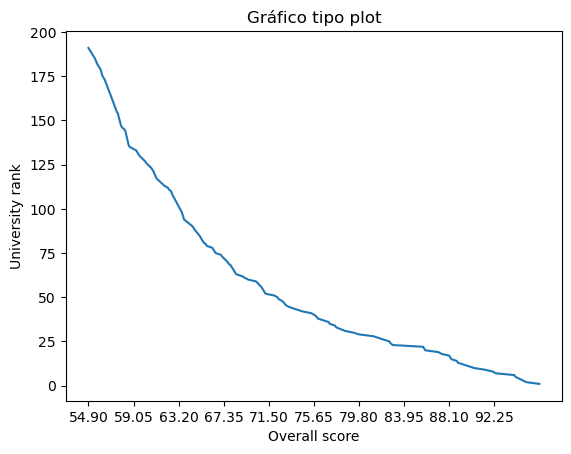

In [2]:

# Nombres de las columnas
columnas = {
    "rank_order": "Integer that defines rank order",
    "rank": "University rank",
    "name": "Name of the University",
    "scores_overall": "Overall score",
    "scores_overall_rank": "Rank of the University by overall score",
    "scores_teaching": "Teaching score - learning environment score",
    "scores_teaching_rank": "Rank of the University by teaching score",
    "scores_research": "Research score - volume, income and \
    reputation of University",
    "scores_research_rank": "Rank of the University by research score",
    "scores_citations": "Citations score - research influence \
    of University",
    "scores_citations_rank": "Rank of the University by \
    citations score",
    "scores_industry_income": "Industry income score - innovations",
    "scores_industry_income_rank": "Rank of the University by \
    industry income score",
    "scores_international_outlook": "International outlook - staff, \
    students and research",
    "scores_international_outlook_rank": "Rank of the University by \
    international outlook score",
    "location": "Country of origin",
    "stats_number_students": "Number of FTE students",
    "stats_student_staff_ratio": "Number of students per staff",
    "stats_pc_intl_students": "International students",
    "stats_female_male_ratio": "Female:Male ratio",
    "aliases": "Extra aliases for the University",
    "subjects_offered": "List of subjects offered by University",
    "closed": "Is university closed",
    "unaccredited": "Is university unaccredited"
}


def grafico_plot(df: pd.DataFrame, columna1: str, columna2: str) -> None:
    """
    Genera un gráfico tipo plot a partir de dos 
    columnas numéricas de un DataFrame.

    Parámetros:
    df (pd.DataFrame): DataFrame con los datos.
    columna1 (str): Nombre de la primera columna numérica.
    columna2 (str): Nombre de la segunda columna numérica.

    Retorna:
    None
    """
    try:
        # Convertir las columnas a numéricas
        df[columna1] = pd.to_numeric(df[columna1], errors='coerce')
        df[columna2] = pd.to_numeric(df[columna2], errors='coerce')

        # Eliminar los datos nulos de las columnas seleccionadas
        df = df.dropna(subset=[columna1, columna2])

        # Crear un gráfico tipo plot
        plt.plot(df[columna1], df[columna2])

        # Título del gráfico
        plt.title("Gráfico tipo plot")

        # Etiquetas de los ejes
        plt.xlabel(columnas[columna1])
        plt.ylabel(columnas[columna2])

        # Calcular el rango de los datos
        rango = max(df[columna1]) - min(df[columna1])

        # Calcular el step
        step = rango / 10

        # Reducir la cantidad de etiquetas en el eje X
        plt.xticks(np.arange(min(df[columna1]), max(df[columna1]), step=step))
        

        # Mostrar el gráfico
        plt.show()


    except pd.errors.ParserError:
        print("Error al leer el archivo CSV.")

    except Exception as e:
        print("Se produjo un error inesperado:", e)


# Llamar a la función 'grafico_plot' con las columnas 'scores_overall' y 'rank'
grafico_plot(df, "scores_overall", "rank")

## Ejercicio 01

Seleccione cinco columnas numéricas del dataset y haga un gráfico tipo **scatter**. Coloque título al gráfico y etiquete los dos ejes.

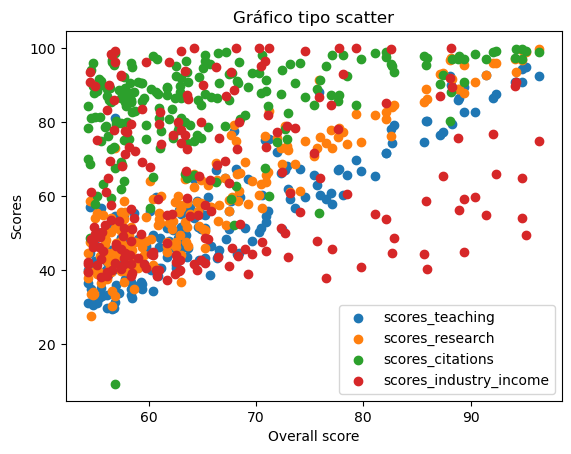

In [3]:
def grafico_scatter(df: pd.DataFrame, columna1: str, columna2: str, columna3: str, columna4: str, columna5: str) -> None:
    """
    Genera un gráfico tipo scatter a partir de cinco 
    columnas numéricas de un DataFrame.

    Parámetros:
    df (pd.DataFrame): DataFrame con los datos.
    columna1 (str): Nombre de la primera columna numérica.
    columna2 (str): Nombre de la segunda columna numérica.
    columna3 (str): Nombre de la tercera columna numérica.
    columna4 (str): Nombre de la cuarta columna numérica.
    columna5 (str): Nombre de la quinta columna numérica.

    Retorna:
    None
    """
    try:
        # Convertir las columnas a numéricas
        df[columna1] = pd.to_numeric(df[columna1], errors='coerce')
        df[columna2] = pd.to_numeric(df[columna2], errors='coerce')
        df[columna3] = pd.to_numeric(df[columna3], errors='coerce')
        df[columna4] = pd.to_numeric(df[columna4], errors='coerce')
        df[columna5] = pd.to_numeric(df[columna5], errors='coerce')

        # Eliminar los datos nulos de las columnas seleccionadas
        df = df.dropna(subset=[columna1, columna2, columna3,
                                columna4, columna5])

        # Crear un gráfico tipo scatter
        plt.scatter(df[columna1], df[columna2], label=columna2)
        plt.scatter(df[columna1], df[columna3], label=columna3)
        plt.scatter(df[columna1], df[columna4], label=columna4)
        plt.scatter(df[columna1], df[columna5], label=columna5)

        # Título del gráfico
        plt.title("Gráfico tipo scatter")

        # Etiquetas de los ejes
        plt.xlabel(columnas[columna1])
        plt.ylabel("Scores")

        # Mostrar la leyenda con los nombres de las columnas
        plt.legend()

        # Mostrar el gráfico
        plt.show()

    except pd.errors.ParserError:
        print("Error al leer el archivo CSV.")

    except Exception as e:
        print("Se produjo un error inesperado:", e)


# Llamar a la función 'grafico_scatter' con las columnas
grafico_scatter(df, "scores_overall", "scores_teaching", "scores_research", 
                    "scores_citations", "scores_industry_income")




## Ejercicio 02

Seleccione cuatro columnas numéricas del dataset y haga un gráfico tipo **stackplot** (apilable). Coloque título al gráfico, etiquete los dos ejes e incluya una leyenda dentro del gráfico.

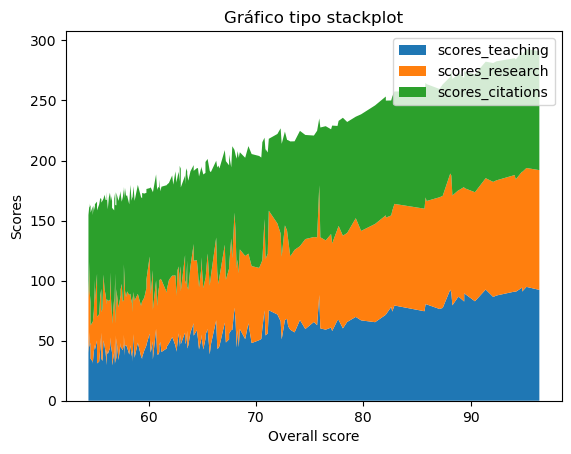

In [4]:
def grafico_stackplot(df: pd.DataFrame, columna1: str, columna2: str, columna3: str, columna4: str) -> None:
    """
    Genera un gráfico tipo stackplot a partir de cuatro 
    columnas numéricas de un DataFrame.

    Parámetros:
    df (pd.DataFrame): DataFrame con los datos.
    columna1 (str): Nombre de la primera columna numérica.
    columna2 (str): Nombre de la segunda columna numérica.
    columna3 (str): Nombre de la tercera columna numérica.
    columna4 (str): Nombre de la cuarta columna numérica.

    Retorna:
    None
    """
    try:
        # Convertir las columnas a numéricas
        df[columna1] = pd.to_numeric(df[columna1], errors='coerce')
        df[columna2] = pd.to_numeric(df[columna2], errors='coerce')
        df[columna3] = pd.to_numeric(df[columna3], errors='coerce')
        df[columna4] = pd.to_numeric(df[columna4], errors='coerce')

        # Eliminar los datos nulos de las columnas seleccionadas
        df = df.dropna(subset=[columna1, columna2, columna3, columna4])

        # Crear un gráfico tipo stackplot
        plt.stackplot(df[columna1], df[columna2], df[columna3], df[columna4])

        # Título del gráfico
        plt.title("Gráfico tipo stackplot")

        # Etiquetas de los ejes
        plt.xlabel(columnas[columna1])
        plt.ylabel("Scores")

        # Mostrar la leyenda con los nombres de las columnas
        plt.legend([columna2, columna3, columna4])

        # Mostrar el gráfico
        plt.show()

    except pd.errors.ParserError:
        print("Error al leer el archivo CSV.")

    except Exception as e:
        print("Se produjo un error inesperado:", e)


# Llamar a la función 'grafico_stackplot' con las columnas
grafico_stackplot(df, "scores_overall", "scores_teaching", "scores_research",
                        "scores_citations")



## Ejercicio 03

Cree una figura que incluya los gráficos construidos en los puntos anteriores en un mismo espacio.

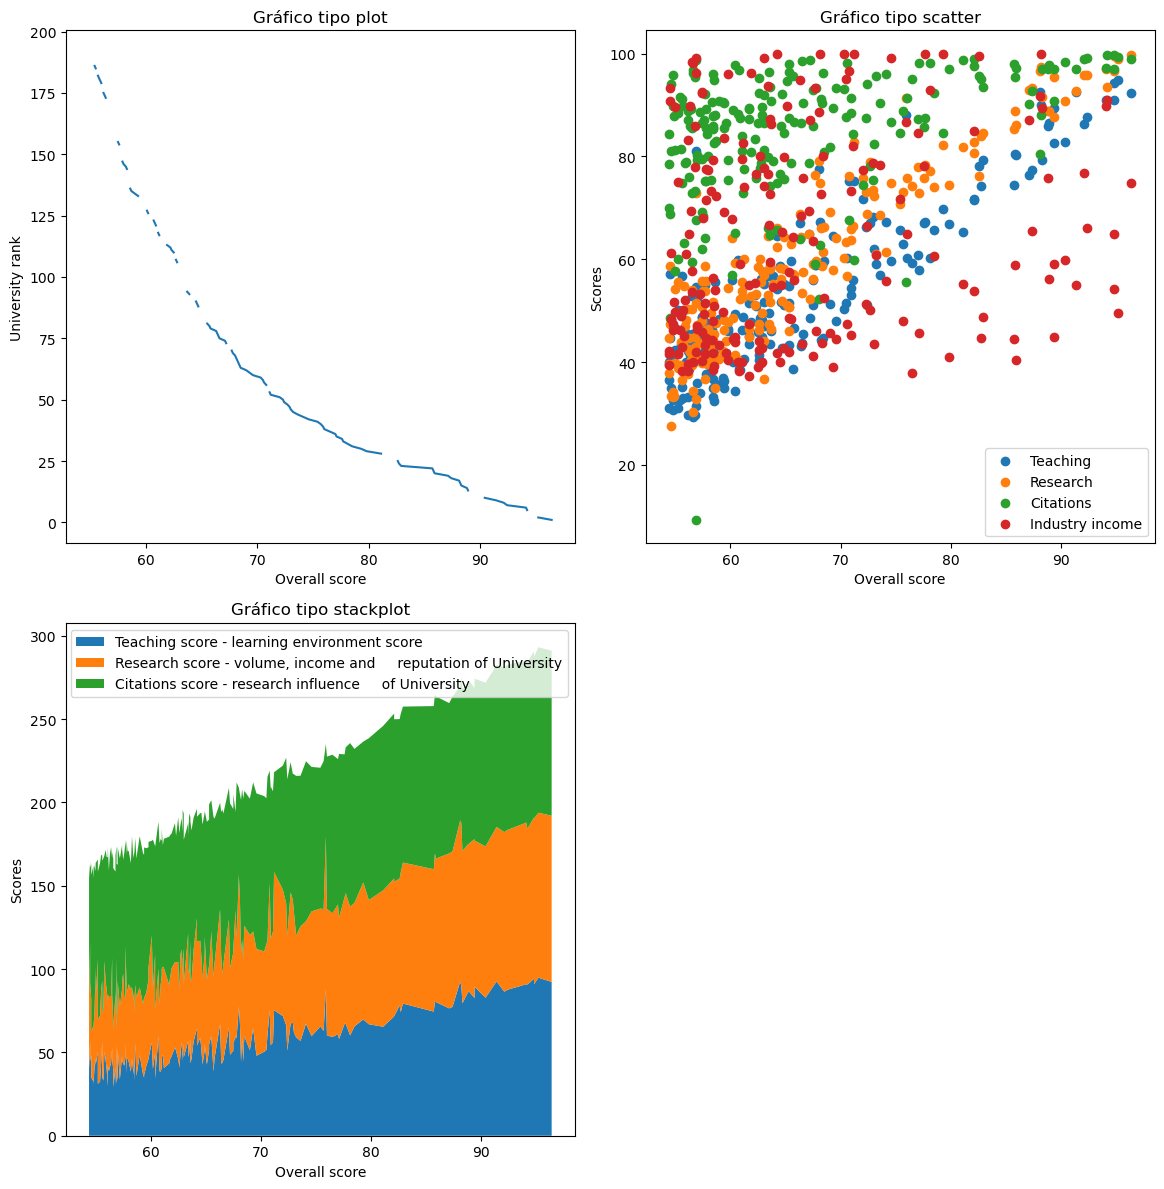

In [5]:
# Crear una figura que incluya los gráficos anteriores
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Gráfico tipo plot
axs[0, 0].plot(df["scores_overall"], df["rank"])
axs[0, 0].set_title("Gráfico tipo plot")
axs[0, 0].set_xlabel(columnas["scores_overall"])
axs[0, 0].set_ylabel(columnas["rank"])

# Gráfico tipo scatter
axs[0, 1].scatter(df["scores_overall"], df["scores_teaching"], label="Teaching")
axs[0, 1].scatter(df["scores_overall"], df["scores_research"], label="Research")
axs[0, 1].scatter(df["scores_overall"], df["scores_citations"],
                    label="Citations")
axs[0, 1].scatter(df["scores_overall"], df["scores_industry_income"],
                    label="Industry income")

axs[0, 1].set_title("Gráfico tipo scatter")
axs[0, 1].set_xlabel(columnas["scores_overall"])
axs[0, 1].set_ylabel("Scores")
axs[0, 1].legend()

# Gráfico tipo stackplot
axs[1, 0].stackplot(df["scores_overall"], df["scores_teaching"],
                    df["scores_research"], df["scores_citations"])
axs[1, 0].set_title("Gráfico tipo stackplot")
axs[1, 0].set_xlabel(columnas["scores_overall"])
axs[1, 0].set_ylabel("Scores")
axs[1, 0].legend([columnas["scores_teaching"], columnas["scores_research"], 
                    columnas["scores_citations"]])

# Eliminar el último gráfico
fig.delaxes(axs[1, 1])

# Ajustar los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()



## Ejercicio 04

Seleccione las columnas que considere pertinentes del dataset y haga un gráfico de barras horizontales. Coloque título al gráfico y etiquete los dos ejes.

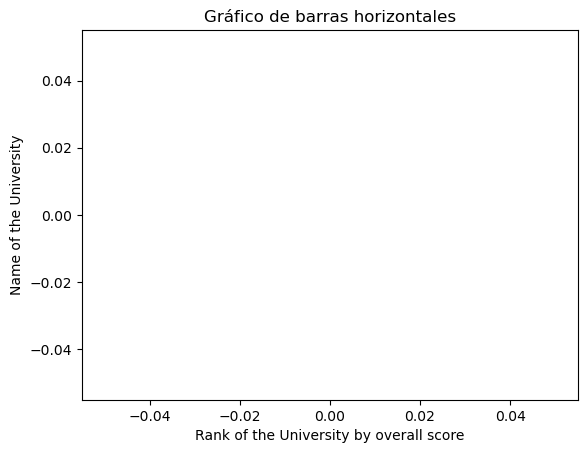

In [16]:
"""
Resuelva los siguientes ejercicios con códigos que se ajusten al PEP8. Recuerde incluir los comentarios en el código y documentar las funciones con docstrings al estilo de Google.

**Importante:**

**no se permite la utilización de ciclos (for or while) para resolver los ejercicios.**

**todos los ejercicios deben ser resueltos con Matplotlib, puede utilizar NumPy y Pandas para la preparación de los datos.**

Seleccione las columnas que considere pertinentes del dataset y haga un gráfico de barras horizontales. Coloque título al gráfico y etiquete los dos ejes.
"""

def grafico_barras_horizontales(df: pd.DataFrame, columna1: str, columna2: str) -> None:
    """
    Genera un gráfico de barras horizontales a partir de dos 
    columnas numéricas de un DataFrame.

    Parámetros:
    df (pd.DataFrame): DataFrame con los datos.
    columna1 (str): Nombre de la primera columna numérica.
    columna2 (str): Nombre de la segunda columna numérica.

    Retorna:
    None
    """
    try:
        # Convertir las columnas a numéricas
        df[columna1] = pd.to_numeric(df[columna1], errors='coerce')
        df[columna2] = pd.to_numeric(df[columna2], errors='coerce')

        # Eliminar los datos nulos de las columnas seleccionadas
        df = df.dropna(subset=[columna1, columna2])

        # Crear un gráfico de barras horizontales
        plt.barh(df[columna1], df[columna2])

        # Título del gráfico
        plt.title("Gráfico de barras horizontales")

        # Etiquetas de los ejes
        plt.xlabel(columnas[columna2])
        plt.ylabel(columnas[columna1])

        # Mostrar el gráfico
        plt.show()

    except pd.errors.ParserError:
        print("Error al leer el archivo CSV.")

    except Exception as e:
        print("Se produjo un error inesperado:", e)
        



## Ejercicio 05

Seleccione las columnas que considere pertinentes del dataset y haga un gráfico de barras verticales. Coloque título al gráfico y etiquete los dos ejes.

In [ ]:
# Escriba su código aquí


## Ejercicio 06

Seleccione las columnas que considere pertinentes del dataset y haga un histograma. Coloque título al gráfico y etiquete los dos ejes.

In [ ]:
# Escriba su código aquí


## Ejercicio 07

Seleccione las columnas que considere pertinentes del dataset y haga un gráfico de torta (**pie chart**). Coloque título al gráfico y etiquete los segmentos del gráfico.

In [ ]:
# Escriba su código aquí


## Ejercicio 08

Seleccione las columnas que considere pertinentes del dataset y haga un mapa de calor (**heatmap**). Coloque título al gráfico y etiquete los dos ejes.

In [ ]:
# Escriba su código aquí


## Ejercicio 09

Seleccione las columnas que considere pertinentes del dataset y haga un gráfico en 3D. Coloque título al gráfico y etiquete los ejes.

In [ ]:
# Escriba su código aquí
